<a href="https://colab.research.google.com/github/mohyunyang/MyStudy/blob/master/ML_Titanic_incomplete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. 임포트를 해보자

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline   notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것 입니다.

# 1. 타이타닉 데이터를 불러와보자

In [5]:
sns.get_dataset_names()  # Seaborn에서 사용할 수 있는 dataset의 목록은 다음과 같다

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [6]:
td = sns.load_dataset('titanic') # 그럼 나는 타이타닉을 선택해야겠다

In [7]:
td.head(10) # 타이타닉 데이터 중 10개만 불러서 전처리작업을 준비하자
# td.tail(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


- pclass : 타이타닉 배 승선권 등급 (1 = 1등급, 2 = 2등급, 3 = 3등급)
- sibsp : 함께 탑승한 형제 또는 배우자 수
- parch : 함께 탑승한 부모 또는 자녀 수
- cabin : 선실 번호
- fare : 티켓의 요금
- Embarked : 승선한 항 (S = southhamton, C = Cherbourg, Q = Queenstown)
- alone : 1인 탑승 여부

--------------------------------------

# 2. 데이터 전처리

# 2-1. 필요한 정보와 불필요한 정보를 걸러보자

In [8]:
# 일단 타이타닉 데이터의 컬럼을 불러와보자
print(td.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [9]:
print(td.info()) # 컬럼은 총 15개, 인덱스는 891 개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [10]:
print(td.shape) # 형태를 보자

(891, 15)


---------------------------------

#### 일단 불필요하거나 중요한지 모르겠는 혹은 생략해도 될거같은 컬럼을 걸러보자
- 'deck' : 중요도를 모르겠음
- 'adult_male' : 중요도를 모르겠음
- 'embark_town' : embarked로 표현됨
- 'who' : age로 가늠됨
- 'alive' : survived로 표현됨
- 'alone' : sibsp 와 parch 의 합이 0 이면 True
- 'class' : pclass 로 표현가능

In [11]:
# df.drop( columns = [""]) 컬럼삭제하는 법
td_1 = td.drop(columns = ['deck', 'adult_male', 'embark_town', 'who', 'alive', 'alone', 'class'])
td_1.head() 

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
# 총 7개의 컬럼을 삭제했다, 형태를 확인해보자
print(td_1.shape)

(891, 8)


#### 합쳐도 될거같은 컬럼은 뭘까?
- sibsp 와 parch 는 합쳐도 될 거 같다. 형제자매 혹은 배우자 부모, 자녀는 Family로 해도 될거같음


In [13]:
# sibsp 와 parch 의 값을 더해서 Family 라는 새로운 컬럼을 만들어보자
# df['키'] = df['A'] + df['B'] 컬럼을 추가하면서 값을 sibsp + parch 로 넣어보자
td_1['family'] = td_1['sibsp'] + td_1['parch']

In [14]:
td_1 # 확인

,survived,pclass,sex,age,sibsp,parch,fare,embarked,family
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0
887,1,1,female,19.0,0,0,30.0000,S,0
888,0,3,female,NaN,1,2,23.4500,S,3
889,1,1,male,26.0,0,0,30.0000,C,0


In [15]:
# 그렇담이제 sibsp 와 parch 컬럼은 삭제해도 될거 같다
td_1 = td_1.drop(columns=['sibsp','parch'])

In [16]:
td_1.head(11) # 확인

,survived,pclass,sex,age,fare,embarked,family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0
5,0,3,male,NaN,8.4583,Q,0
6,0,1,male,54.0,51.8625,S,0
7,0,3,male,2.0,21.0750,S,4
8,1,3,female,27.0,11.1333,S,2
9,1,2,female,14.0,30.0708,C,1


#### 숫자로 표기 할 수 있는 부분은 어떤게 있을까?
- sex 같은 경우 male 이면 0, female 이면 1
- embarked 도 경우의 수가 3가지 밖에없어서 숫자로 표기해도 될거같은데 일단은 보류

In [74]:
# 'sex' 컬럼 중 male 은 1로 female 은 2로 바꾸자
# td_1['sex'] = td_1['sex'].replace({'male':1, 'female':2})
td_1['sex'] = td_1['sex'].replace({1:5, 2:5})

In [75]:
td_1.head()

,sex,age,pclass,fare,embarked,family,survived
803,5,0.42,3,8.5167,C,1,1
755,5,0.67,2,14.5000,S,2,1
644,5,0.75,3,19.2583,C,3,1
469,5,0.75,3,19.2583,C,3,1
831,5,0.83,2,18.7500,S,2,1


# 2-2 결측치 처리하기

In [19]:
td_1.info() 
# 결측치 정보를 보면 age, embarked 이렇게 두 컬럼이 Nan 데이타가 있음을 확인했다 
#.isnull().sum(axis=0) 를 사용해 좀 더 자세히 보자

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       714 non-null    float64
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   family    891 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [20]:
# Nan 데이터 확인하기 .isnull().sum()
td_1.isnull().sum(axis=0)

survived      0
pclass        0
sex           0
age         177
fare          0
embarked      2
family        0
dtype: int64

- 누락데이터의 개수가 나왔다
- Nan 데이터를 다른 값으로 대체해야 될 거같다
- age는 age의 평균값을 넣는걸로 대체하거나 삭제하는 쪽으로 선택해야 될 거 같다. 평균으로 대체하자
- embarked 는 Nan 이 2개 밖에 안된다. 어떻게 해야될까? S로 대체하자

In [21]:
# Nan 데이터를 age의 평균으로 넣자
# df['키'].fillna("바꿀내용", inplace=True) 
td_1.fillna(td_1['age'].mean(), inplace=True)

In [22]:
td_1.head(10) # 확인

,survived,pclass,sex,age,fare,embarked,family
0,0,3,1,22.000000,7.2500,S,1
1,1,1,2,38.000000,71.2833,C,1
2,1,3,2,26.000000,7.9250,S,0
3,1,1,2,35.000000,53.1000,S,1
4,0,3,1,35.000000,8.0500,S,0
5,0,3,1,29.699118,8.4583,Q,0
6,0,1,1,54.000000,51.8625,S,0
7,0,3,1,2.000000,21.0750,S,4
8,1,3,2,27.000000,11.1333,S,2
9,1,2,2,14.000000,30.0708,C,1


In [16]:
# 'embarked' 의 NaN 데이터를 최빈값으로 넣기
td_1.fillna(td_1['embarked'.mode()[0],inplace=True)  # mode() 함수는 최빈수를 찾고 [0]은 가장 많은 갯수 첫번째라는 뜻

SyntaxError: ignored

In [23]:
td_1.isnull().sum(axis=0) # 결측치는 이제 없다

survived    0
pclass      0
sex         0
age         0
fare        0
embarked    0
family      0
dtype: int64

---------------

# 3. Data Visualization (데이터 시각화)
사용할 플롯들을 생각해보자

In [24]:
td_1.head(10)

,survived,pclass,sex,age,fare,embarked,family
0,0,3,1,22.000000,7.2500,S,1
1,1,1,2,38.000000,71.2833,C,1
2,1,3,2,26.000000,7.9250,S,0
3,1,1,2,35.000000,53.1000,S,1
4,0,3,1,35.000000,8.0500,S,0
5,0,3,1,29.699118,8.4583,Q,0
6,0,1,1,54.000000,51.8625,S,0
7,0,3,1,2.000000,21.0750,S,4
8,1,3,2,27.000000,11.1333,S,2
9,1,2,2,14.000000,30.0708,C,1


# 3-1 약간 편집

컬럼을 보기 좋게 
- 1. 'sex','age',pclass','fare','embarked',family','survived' 순으로 나타내고
- 2. 나이를 내림차순으로 해보자

In [27]:
# 컬럼 순서정하기 df = pd.DataFrame(data, colums=['이름','학교'...)
td_1 = pd.DataFrame(td_1, columns=['sex','age','pclass','fare','embarked','family','survived'])
td_1.head()

,sex,age,pclass,fare,embarked,family,survived
0,1,22.0,3,7.2500,S,1,0
1,2,38.0,1,71.2833,C,1,1
2,2,26.0,3,7.9250,S,0,1
3,2,35.0,1,53.1000,S,1,1
4,1,35.0,3,8.0500,S,0,0


In [28]:
# 나이를 내림차순으로 df.sort_values('키', ascending=False)
td_1.sort_values('age', ascending=True,inplace=True)
td_1.head(10)

,sex,age,pclass,fare,embarked,family,survived
803,1,0.42,3,8.5167,C,1,1
755,1,0.67,2,14.5000,S,2,1
644,2,0.75,3,19.2583,C,3,1
469,2,0.75,3,19.2583,C,3,1
831,1,0.83,2,18.7500,S,2,1
78,1,0.83,2,29.0000,S,2,1
305,1,0.92,1,151.5500,S,3,1
164,1,1.00,3,39.6875,S,5,0
827,1,1.00,2,37.0042,C,2,1
172,2,1.00,3,11.1333,S,2,1


# 3-2 데이터 시각화

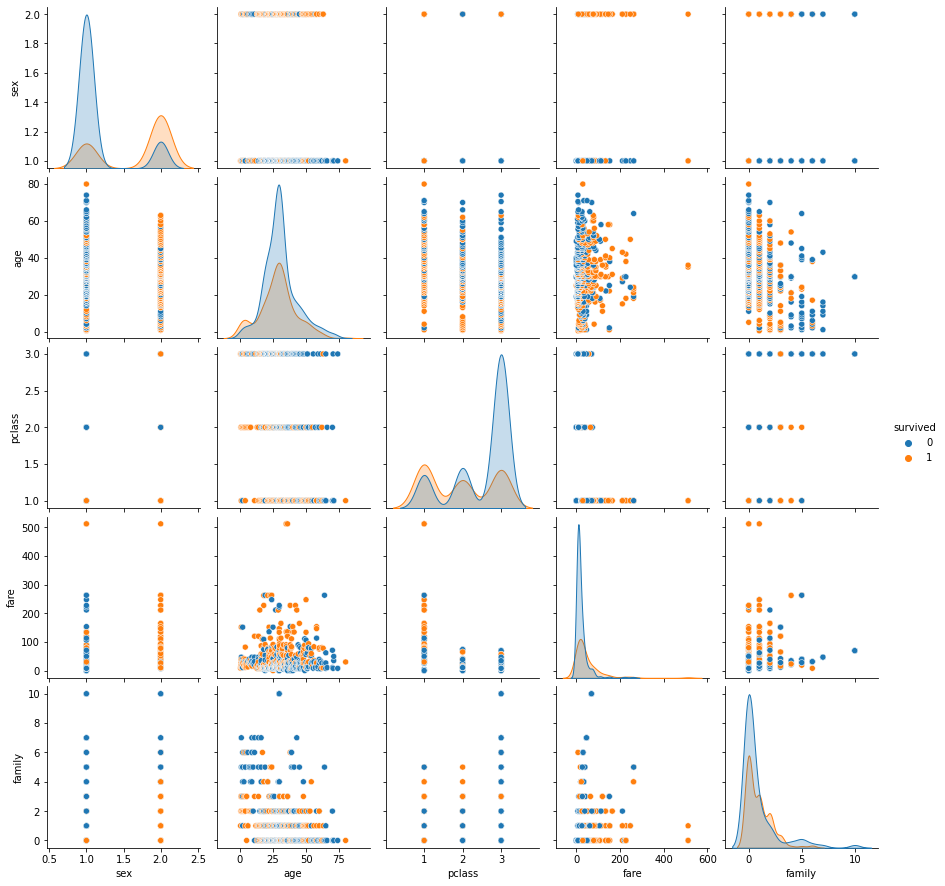

In [67]:
sns.pairplot(td_1, hue='survived') # 뭔가 그림이 나왔다 # hue 매개 변수를 사용하여 서로 다른 색상으로 서로 다른 범주를 표시 할 수 있다.

### Countplot

남녀 생존/사망자 countplot 사용하여 나타내기

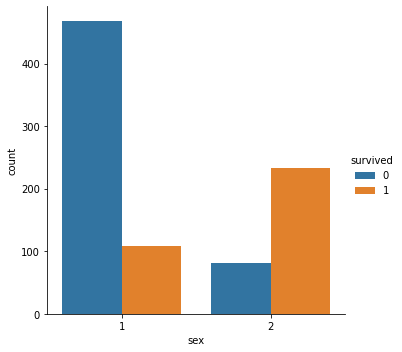

In [68]:
sns.catplot(x ="sex", hue ="survived",kind ="count", data = td_1)

- 남자는 400명이상 사망인 반면, 여자는 100명 사망 , 사망률이 남자가 높다
- 남자는 약 100명 생존, 여자는 200명 이상 생존 , 생존률이 여자가 높다

In [69]:
# 생존자와 사망자 숫자 세기 df['who'].value_counts() 
print(td_1['survived'].value_counts())

# 남자 중 생존자, 사망자 숫자 세기 
m0 = td_1.loc[(td_1['sex']=='male') & (td_1['survived']==0)]
print(m0.shape)   # 남자사망자 총 468명
m1 = td_1.loc[(td_1['sex']=='male') & (td_1['survived']==1)]
print(m1.shape)  # 남자사망자 총 109 명

# 여자 중 생존자, 사망자 숫자 세기
f0 = td_1.loc[(td_1['sex']=='female') & (td_1['survived']==0)]
print(f0.shape)    # 여자사망자 총 81명
f1 = td_1.loc[(td_1['sex']=='female') & (td_1['survived']==1)]
print(f1.shape)   # 여자생존자 총 233명

0    549
1    342
Name: survived, dtype: int64
(0, 7)
(0, 7)
(0, 7)
(0, 7)


등석별 항구 생존/사망자 countplot 사용하여 나타내기

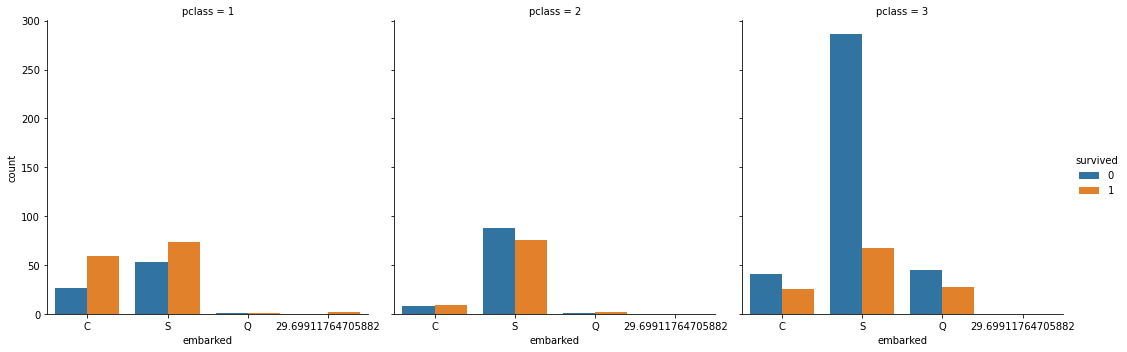

In [70]:
# sns.catplot(x ='Embarked', hue ='Survived',kind ='count', col ='Pclass', data = data_train)
sns.catplot(x = 'embarked', hue='survived', kind='count', col='pclass', data = td_1)  # x는 embarked , hue 사용해 survived로 서로 다른 색상으로 서로 다른 범주를 표시 # col ??

- S(southhamton) 에서 탑승한 사람이 많이 사망했음을 알 수 있다. S항구에서 사망한 사람들은 대부분 pclass가 3등석이 많았다 반면 나머지 항구와 생존자의 수의 관계는 잘 모르겠다

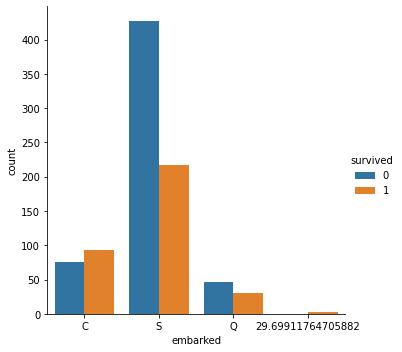

In [71]:
sns.catplot(x = 'embarked', hue='survived', kind='count', data = td_1) 

- S(southhamton) 에서 많은 사람들이 비교적 다른 곳보다 많은 사람들이 탑승했다.  탑승자 수가 높은 만큼 사망자 생존자 수도 다른 곳보다 높게 나왔다
-  C(Cherbourg) 항구에서 탑승자는 생존자가 사망자보다 조금 더 높았다

---------------

# DecisionTree

In [76]:
td_1.tail(10)

,sex,age,pclass,fare,embarked,family,survived
280,5,65.0,3,7.7500,Q,0,0
456,5,65.0,1,26.5500,S,0,0
33,5,66.0,2,10.5000,S,0,0
745,5,70.0,1,71.0000,S,2,0
672,5,70.0,2,10.5000,S,0,0
116,5,70.5,3,7.7500,Q,0,0
96,5,71.0,1,34.6542,C,0,0
493,5,71.0,1,49.5042,C,0,0
851,5,74.0,3,7.7750,S,0,0
630,5,80.0,1,30.0000,S,0,1


In [77]:
# 1.Titanic 데이터에서 필요한 특성만 분류한 td_1를 넘파이 배열로 나열한 뒤 data 에 담는다
data = td_1[['sex','age','fare', 'family']].to_numpy() 
print(data)
print(data.shape)

# survived 만 따로 넘파이배열로 나열한뒤 target 에 담는다
target = td_1['survived'].to_numpy()
print(target)
print(target.shape)

[[ 5.      0.42    8.5167  1.    ]
 [ 5.      0.67   14.5     2.    ]
 [ 5.      0.75   19.2583  3.    ]
 ...
 [ 5.     71.     49.5042  0.    ]
 [ 5.     74.      7.775   0.    ]
 [ 5.     80.     30.      0.    ]]
(891, 4)
[1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1
 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1
 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1
 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1
 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1
 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 1 0 0 0 1 1 1 0 0 0 1 

In [78]:
# 1. sklearn.model 로 부터 train_test_split 을 불러온다
from sklearn.model_selection import train_test_split

# 2. date 에 있는 특성값들을 train_input 과 test_input에 각각 7:3 비율로 나눈다. test 세트 또한 동일하게 나눈다
train_input, test_input, train_target, test_target = train_test_split(
    data, target
)

In [37]:
# 잘 나뉜걸 확인 할 수 있다
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(668, 4) (668,)
(223, 4) (223,)


In [38]:
# 정규화 작업을 실행한다. 특성끼리의 값들이 크게 차이나는건 아닌거 같지만 일단 안전하게 실행해본다.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()  
ss.fit(train_input)     # 다음과 같이 train 세트를 훈련시킨다
train_scaled = ss.transform(train_input) # train 세트를 정규화시킨 것을 train_scaled에
test_scaled = ss.transform(test_input)  # test 세트를 정규화시킨 것을 test_scaled로 

# 오류가 떴었다. sex 가 문자열이여서 실수형으로 변환 할 수 없다고 하니 sex를 숫자로 표기해서 다시돌아오자 
# 결정트리는 실수형의 값을 가진 특성만 다룰 수 있다는 걸 알았다

In [39]:
# 결정트리를 진행하기 전 로지스틱 회귀모델을 한번 돌려보자
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()  
lr.fit(train_scaled, train_target)     # 로지스틱회귀모델로 train세트를 훈련시킨다
print(lr.score(train_scaled, train_target)) # 로지스텍회귀모델로 훈련시킨 train세트 점수확인
print(lr.score(test_scaled, test_target))  # 로지스텍회귀모델로 훈련시킨 test세트 점수확인


0.781437125748503
0.8026905829596412


로지스텍 회귀 모델로 훈련해서 스코어를 확인해보았다. 확인 결과 훈련세트보다 테스트 세트의 점수가 높게 나왔다. 둘다 점수가 낮은걸보니 성능이 낮은 과소적합이라 할 수 있겠다.
- Q? 근데 테스트 세트가 점수가 왜 더 높게 나왔지? 의문이든다

In [79]:
print(lr.coef_, lr.intercept_) # 로지스틱회귀가 학습한 계수와 절편이다

[[ 1.21651237 -0.30276143  0.79669043 -0.4588295 ]] [-0.53325337]


### 잠시 고민

- 'sex','age','fare', 'family' 순으로 보면되는데
- 이 로지스틱 회귀모델이 왜 저런 계수값을 학습했는지 정확히 이해하기 어렵다. 
- 'age' 와 'family'를 제외한 'sex' 나 'pclass'는 수치가 아닌 0,1 또는 1,2,3 으로 구분하는 범주형이라 뭔가 로지스틱회귀와 어울리는 특성이 아닌걸까? 

### 결정트리 

In [80]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)        # 결정트리모델로 train세트를 학습시켰다
print(dt.score(train_scaled, train_target)) # 점수확인
print(dt.score(test_scaled, test_target))   # 점수확인

0.9505988023952096
0.5291479820627802


이번엔 결정트리모델을 사용했다.
- 훈련세트에 대한 점수가 높게 나왔다
- 반면 테스트세트에 대한 성능은 그에 비해 조금 낮다
- 과대 적합된 모델이다

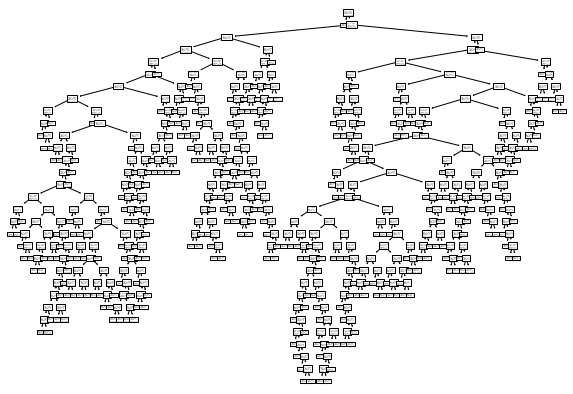

In [81]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))           # figsize(가로,세로)
plot_tree(dt)        # 이미 결정트리 알고리즘으로 훈련시킨 dt를 불러와 그림그리기
plt.show()

위에서 만든 결정트리모델객체를 plot_tree() 함수에 전달해서 어떤 트리가 만들어졌나 보자. 다음으로는 깊이를 제한해서 출력해보자.

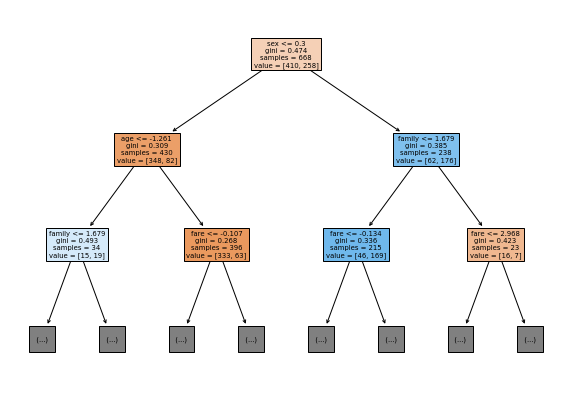

In [46]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=2, filled=True, feature_names=['sex','age','fare', 'family']) 
plt.show()

max_depth 로 깊이를 2으로 정하니 다음과 같은 그림이 그려졌다


--------------

In [82]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.6317365269461078
0.6278026905829597


결과가 비슷해진거같은데 최적의 점수인지는 잘 모르겠다

------------

교차검증

In [83]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_scaled, train_target)
print(scores)

{'fit_time': array([0.00601816, 0.00148821, 0.00130343, 0.00141859, 0.01143909]), 'score_time': array([0.0067265 , 0.00052643, 0.01074576, 0.00053072, 0.00072193]), 'test_score': array([0.58208955, 0.57462687, 0.60447761, 0.60902256, 0.55639098])}


In [84]:
print(np.mean(scores['test_score']))

0.5853215127370666


교차검증을 수행하면 입력한 모델에서 얻을 수 있는 최상의 검증점수를 가늠할 수 있다

In [60]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv = StratifiedKFold())
print(np.mean(scores['test_score']))

0.8173156772528335


In [62]:
splitter = StratifiedKFold(n_splits=10, shuffle=True)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8025327905924919


교차검증을 수행후 테스트스코어를 보았는데 점수가 오히려 떨어졌다..

-----------

# 랜덤 포레스트

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1)
scores = cross_validate(rf, train_scaled, train_target,
                        return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9917652000420036 0.8114128605094827


In [65]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1)
rf.fit(train_scaled, train_target)
print(rf.oob_score_)

0.8203592814371258


In [66]:
print(rf.feature_importances_)

[0.26368964 0.28075708 0.3569688  0.09858449]
